<a href="https://colab.research.google.com/github/ViejoLoco27/Programa-ONE-Curso_de_estadistica/blob/main/g_colab_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📘 Sección I: Fundamentos Conceptuales

**Objetivo:** Evaluar tu comprensión teórica sobre las principales medidas descriptivas.

1. ¿Qué representan los grados de libertad en el cálculo de la varianza muestral?
**RESPUESTA: Los grados de libertad en la varianza muestral se representa con n-1. Esto significa que al tamaño de la muestra se le esta resta la media, en efecto la media muestral es un grado de libertad que se le resta al tamaño.**

2. ¿Por qué la Mediana de las Desviaciones Absolutas (MAD) es más resistente que la desviación estándar en presencia de outliers?
**RESPUESTA: Porque, recordando que la mediana es el punto intermedio de los valores en términos de la posición o localización de los valores de una muestra. Esto hace que el punto de referencia se ajuste mejor a la distribución de los valores.**

3. ¿Cómo interpretar el rango intercuartílico en un conjunto de ingresos?
**RESPUESTA:El rango Intercuartílico es una medida de localización, lo que significa que esta medida nos ayuda a ver cómo se distribuyen los datos una vez ordenados. Los rangos intercuartiatilicos se pueden ver como la segmentación de datos para conocer la concetración de los valores en términos de proporción de la población o muestra.**

4. Describe la relación entre moda, mediana y media en distribuciones simétricas y asimétricas.
**RESPUESTA: Moda < Mediana < Media → Asimetría positiva (cola a la derecha)
Moda > Mediana > Media → Asimetría negativa (cola a la izquierda)**


5. Explica la diferencia conceptual entre varianza poblacional y varianza muestral.

**La distinción entre estos dos conceptos se localiza en el denominador, ya que la varianza muestra considera un estimador del tamaño de la población en el denominador. Dicho de otro modo al denominador de la varianza muestral se calcula con el tamaño de la muestra menos un grado de libertad.**


## 💻 Sección II: Prueba Técnica en Python

**Objetivo:** Aplicar conocimientos con Pandas, Seaborn y Scipy sobre el archivo `Nuevos_datos_ML.txt`.

1. Calcula la media, mediana y moda del `Ingreso` por `Sexo`. Usa `groupby()` y `.agg()`.
2. Agrupa los datos por rangos de `Edad` utilizando `pd.cut()` con la regla de Sturges. Calcula el ingreso promedio por grupo.
3. Genera un boxplot del ingreso de personas con menos de 5000 pesos, comparado por `Sexo`.
4. Calcula la DMA y la MAD del `Ingreso` para personas con más de 12 años de estudio.
5. Extrae una muestra aleatoria de 20 registros. Calcula media, mediana, desviación estándar y visualiza con `histplot()` y `boxplot()`.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
datos = pd.read_csv('/content/Nuevos_datos_ML.txt')

In [ ]:
distmean_sexo_ingreso = round(datos.groupby(['Sexo'])[['Ingreso']].mean(),2)

In [ ]:
distmedian_sexo_ingreso = datos.groupby(['Sexo'])[['Ingreso']].median()

* The lambda function lambda x: x.mode()[0] if not x.mode().
empty else 'No mode' is a concise way to define the function that will be applied to the 'Ingreso' column within each 'Sexo' group:

* x represents the 'Ingreso' Series for the current group (e.g., the 'Ingreso' values for Sexo 0, and then the 'Ingreso' values for Sexo 1).

* x.mode() calculates the mode(s) for that specific group's 'Ingreso' values. .mode() can return multiple values if there are ties.

In [ ]:
distmode_sexo_ingreso = datos.groupby(['Sexo'])[['Ingreso']].agg(lambda x:x.mode()[0])

In [ ]:
df_dist_ingreso_sexo = pd.concat([distmean_sexo_ingreso,distmedian_sexo_ingreso,distmode_sexo_ingreso],axis=1)
df_dist_ingreso_sexo

,Ingreso,Ingreso,Ingreso
Sexo,,,
0,1639.75,1400.0,2000
1,1309.94,1000.0,1000


In [ ]:
df_dist_ingreso_sexo.columns = ['Ingreso_promedio','Mediana_del_Ingreso','Moda_del Ingreso']
df_dist_ingreso_sexo

,Ingreso_promedio,Mediana_del_Ingreso,Moda_del Ingreso
Sexo,,,
0,1639.75,1400.0,2000
1,1309.94,1000.0,1000


In [ ]:
n = datos.Edad.shape[0]
k = int(1+(10/3)*np.log10(n))

In [ ]:
datos['Edad'].max()

73

In [ ]:
df_edad_ingreso = datos.groupby(pd.cut(datos['Edad'],bins = 7, precision=0, include_lowest=True))[['Ingreso']].mean()
df_edad_ingreso = df_edad_ingreso.sort_values('Edad', axis=0, ascending=False)
df_edad_ingreso = df_edad_ingreso['Ingreso'].round(2)
df_edad_ingreso.rename(index='Ingreso_por_edades', inplace=True)
df_edad_ingreso = pd.DataFrame(df_edad_ingreso)
df_edad_ingreso = df_edad_ingreso.reset_index()
df_edad_ingreso


/tmp/ipython-input-9-2700366771.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_edad_ingreso = datos.groupby(pd.cut(datos['Edad'],bins = 7, precision=0, include_lowest=True))[['Ingreso']].mean()


,Edad,Ingreso_por_edades
0,"(66.0, 73.0]",1515.00
1,"(59.0, 66.0]",1290.00
2,"(52.0, 59.0]",2378.57
3,"(44.0, 52.0]",1794.44
4,"(37.0, 44.0]",1518.32
5,"(30.0, 37.0]",1384.61
6,"(22.0, 30.0]",1163.69


<Axes: xlabel='Ingreso', ylabel='Edad_rango'>

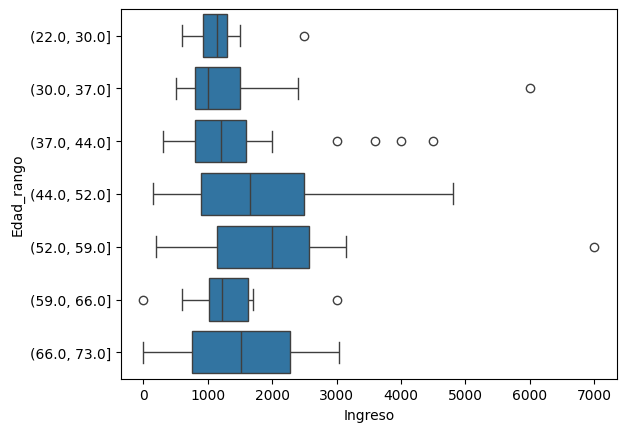

In [ ]:
datos['Edad_rango'] = pd.cut(datos['Edad'], bins=7, precision=0, include_lowest=True)

sns.boxplot(x='Ingreso', y='Edad_rango', data=datos, orient='h')

Text(0.5, 1.0, 'Distribución del Ingreso por sexo')

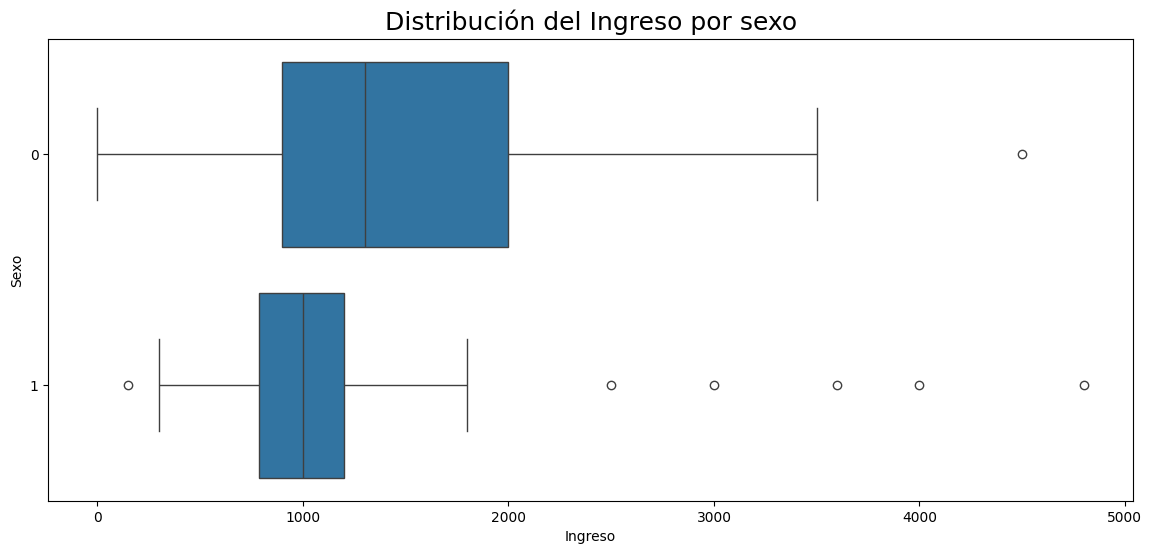

In [ ]:
ax_ingreso_sexo =sns.boxplot(x = 'Ingreso', y = 'Sexo', data = datos.query("Ingreso < 5000"), orient='h')

ax_ingreso_sexo.figure.set_size_inches(14,6)
ax_ingreso_sexo.set_title('Distribución del Ingreso por sexo', fontsize=18)

Text(0.5, 1.0, 'Distribución de años de estudio por sexo')

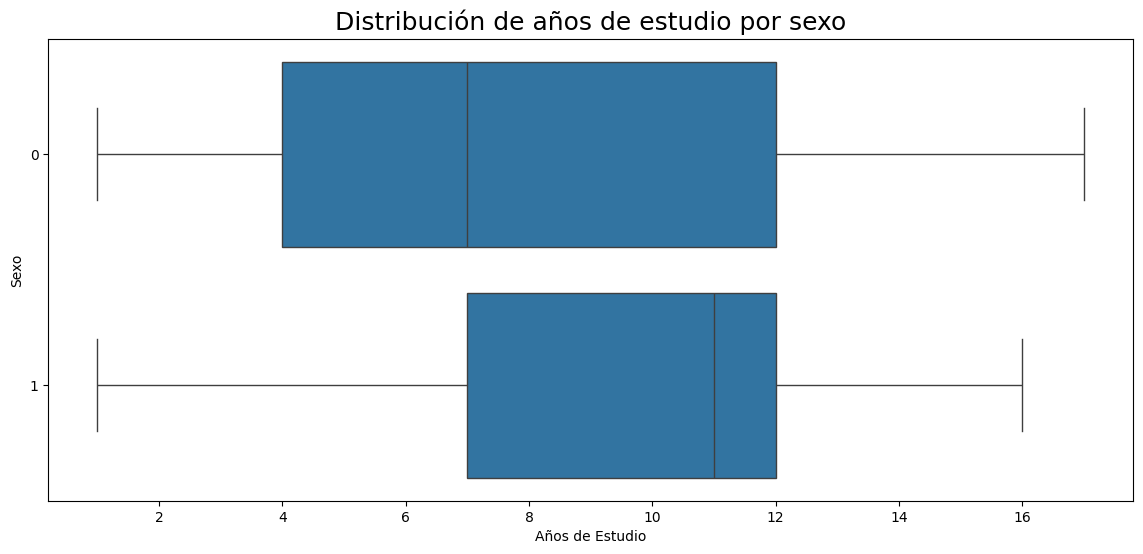

In [ ]:
ax_ade_sexo =sns.boxplot(x = 'Años de Estudio', y = 'Sexo', data = datos.query("Ingreso < 5000"), orient='h')
ax_ade_sexo.figure.set_size_inches(14,6)
ax_ade_sexo.set_title('Distribución de años de estudio por sexo', fontsize=18)

In [ ]:
!pip install scipy
import scipy.stats as stats

In [ ]:
filtro_anos_estudio = datos[datos['Años de Estudio'] == 12]
filtro_anos_estudio = filtro_anos_estudio.reset_index()
filtro_anos_estudio[['Años de Estudio','Ingreso']]

,Años de Estudio,Ingreso
0,12,800
1,12,1150
2,12,790
3,12,3150
4,12,1700
5,12,1150
6,12,3000
7,12,2000
8,12,2000
9,12,2000


In [ ]:
df_dma_ingresos_ade12 = pd.DataFrame(filtro_anos_estudio['Ingreso'])
df_dma_ingresos_ade12['Desviación'] =df_dma_ingresos_ade12['Ingreso'] - df_dma_ingresos_ade12['Ingreso'].mean()
df_dma_ingresos_ade12['|Desviación|'] = df_dma_ingresos_ade12['Desviación'].abs()
df_dma_ingresos_ade12

,Ingreso,Desviación,|Desviación|
0,800,-941.25,941.25
1,1150,-591.25,591.25
2,790,-951.25,951.25
3,3150,1408.75,1408.75
4,1700,-41.25,41.25
5,1150,-591.25,591.25
6,3000,1258.75,1258.75
7,2000,258.75,258.75
8,2000,258.75,258.75
9,2000,258.75,258.75


In [ ]:
mad_ingresos_ade12 = stats.median_abs_deviation(df_dma_ingresos_ade12['Ingreso'])
mad_ingresos_ade12

np.float64(555.0)

In [ ]:
datos_sample20 = datos.sample(n=20, random_state=1)
datos_sample20 = pd.DataFrame(datos_sample20)
datos_sample20 = datos_sample20.reset_index()
datos_sample20['Ingreso']

,Ingreso
0,800
1,1500
2,920
3,1700
4,1400
5,7000
6,1200
7,788
8,800
9,1000


In [ ]:
datos_sample20['Ingreso'].mean()

np.float64(1575.4)

In [ ]:
datos_sample20['Ingreso'].mode()

,Ingreso
0,800
1,1000
2,1500


In [ ]:
datos_sample20['Ingreso'].median()

1100.0

/tmp/ipython-input-81-496907861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_sample20 = sns.distplot(datos_sample20['Ingreso'],kde=True)


Text(0.5, 1.0, 'Distribución de Ingresos | Muestreo aleatorio n=20')

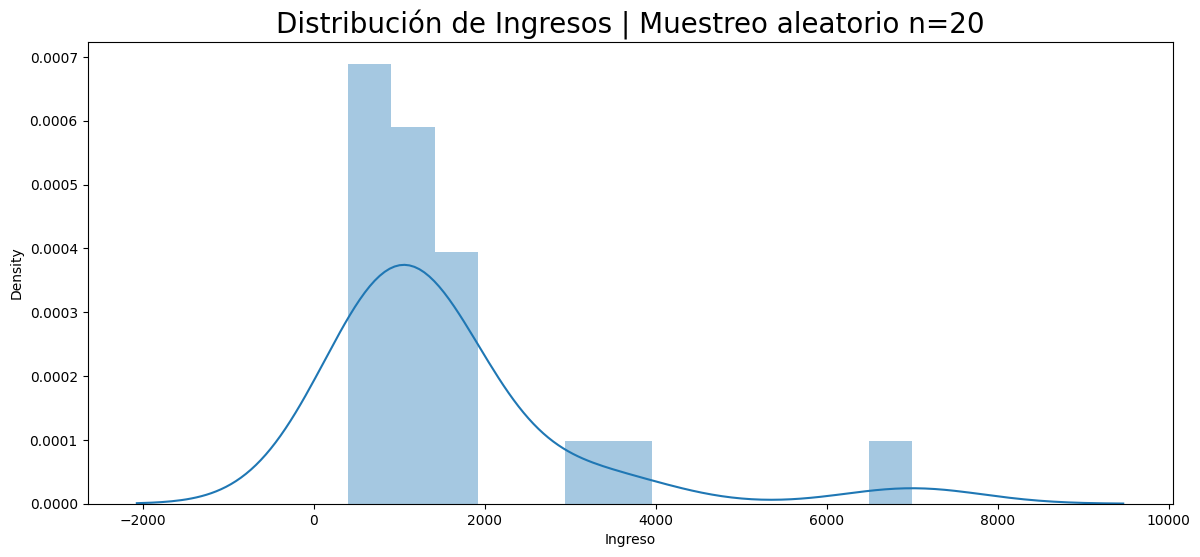

In [ ]:
ax_sample20 = sns.distplot(datos_sample20['Ingreso'],kde=True)

ax_sample20.figure.set_size_inches(14,6)
ax_sample20.set_title('Distribución de Ingresos | Muestreo aleatorio n=20', fontsize=20)

Text(0.5, 1.0, 'Distribución de Ingresos | Muestreo aleatorio n=20')

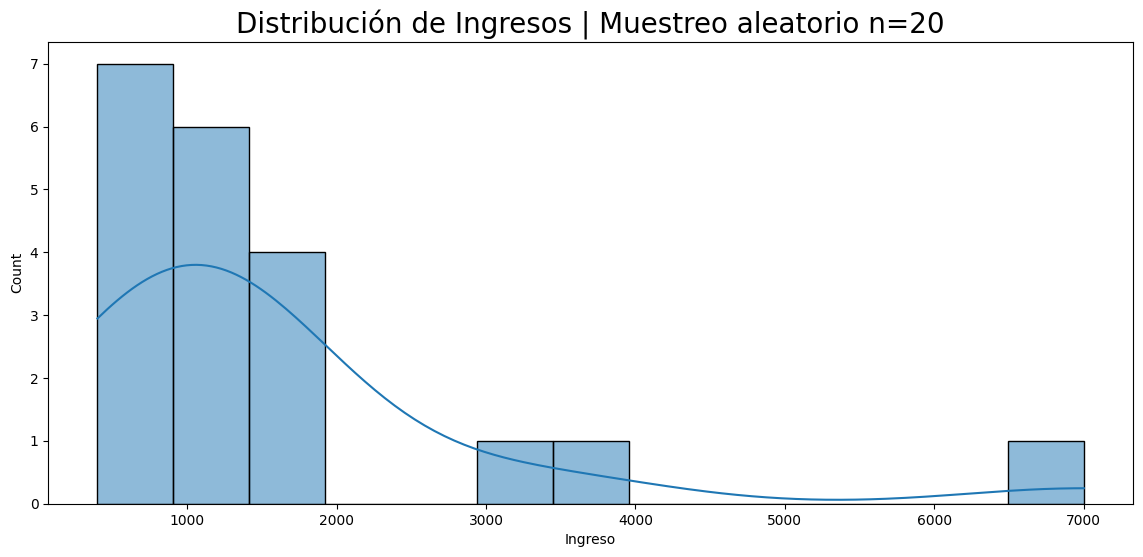

In [ ]:
ax_sample20_hist = sns.histplot(datos_sample20['Ingreso'],kde=True)

ax_sample20_hist.figure.set_size_inches(14,6)
ax_sample20_hist.set_title('Distribución de Ingresos | Muestreo aleatorio n=20', fontsize=20)

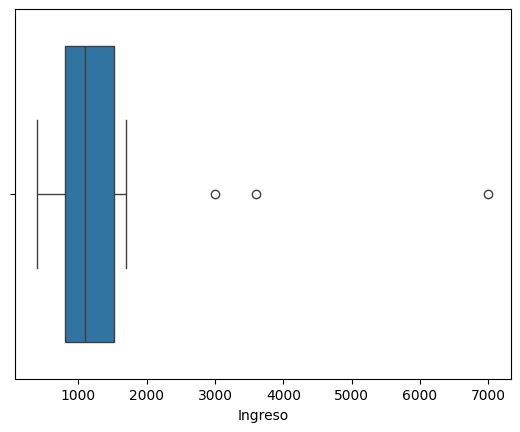

In [ ]:
ax_sample20_bplot = sns.boxplot(x = 'Ingreso', data = datos_sample20, orient='h')

## 📊 Sección III: Interpretación Visual

**Objetivo:** Analizar gráficos como herramientas de diagnóstico estadístico.

### 🔍 Pregunta 1

<img width="540" height="149" alt="Image" src="https://github.com/user-attachments/assets/9aa7f6ff-708c-450c-aeab-75fd3fe005f6" />

<img width="540" height="212" alt="Image" src="https://github.com/user-attachments/assets/94546de6-63a2-4211-9c5b-f2fdeccf7415" />

> A partir del gráfico, identifica cuál de los tres tipos de distribución representa mejor los ingresos en el archivo `Nuevos_datos_ML.txt`.
>
**Respuesta: La muestra aleatoria que tomamos muestra una asimetría positiva (asimetría a la derecha)**
> Justifica tu respuesta utilizando media, mediana, moda y rango intercuartílico.
**Respuesta: Cuando el conjunto de datos tiene múltiples modas, comparo cada valor modal con la mediana y la media para identificar su ubicación relativa. Si una moda dominante está lejos del centro (mediana), indica posible asimetría. No tomo una única moda como verdad absoluta, sino que evalúo el conjunto de picos para entender la forma global de la distribución.**
>
---

### 📚 Pregunta 2

<img width="1114" height="497" alt="Image" src="https://github.com/user-attachments/assets/6417fee0-599e-44ed-9c9a-e94dc512f6da" />

> Observa el gráfico. ¿Cuáles materias están por debajo del estándar de 8?

**Respuesta: Inglés e Historia**  
> ¿Qué materia tiene mayor dispersión?

**Inglés**
> ¿Qué tipo de visualización en Python replicaría mejor esta gráfica?

**Scatterplot**

## 🧭 Sección IV: Análisis Aplicado + Reflexión

**Objetivo:** Vincular técnica estadística con visión social.

> A partir del archivo `Nuevos_datos_ML.txt`, identifica un grupo de personas que presente desigualdad económica.  
>
> Apóyate en medidas de tendencia, dispersión y visualización para sostener tu análisis.  
>
> Finaliza con una reflexión sobre cómo este tipo de análisis podría usarse para influir en políticas públicas o decisiones educativas.


In [ ]:
datos.Sexo.value_counts()

,count
Sexo,
0,65
1,33


Text(0.5, 1.0, 'Distribución del Ingreso por sexo')

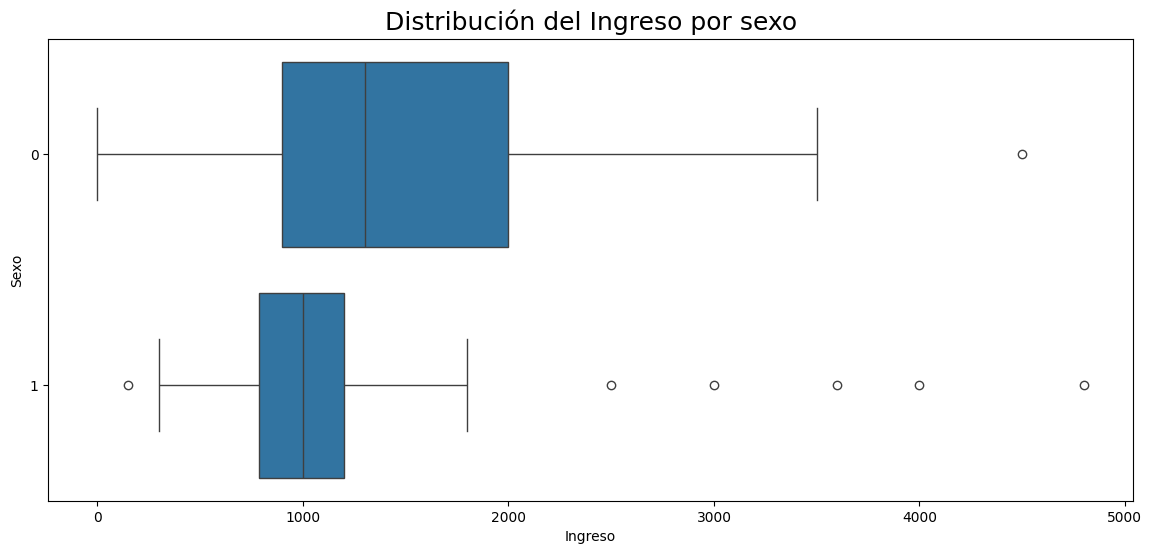

In [ ]:
ax_ingreso_sexo =sns.boxplot(x = 'Ingreso', y = 'Sexo', data = datos.query("Ingreso < 5000"), orient='h')
ax_ingreso_sexo.figure.set_size_inches(14,6)
ax_ingreso_sexo.set_title('Distribución del Ingreso por sexo', fontsize=18)

Text(0.5, 1.0, 'Distribución de años de estudio por sexo')

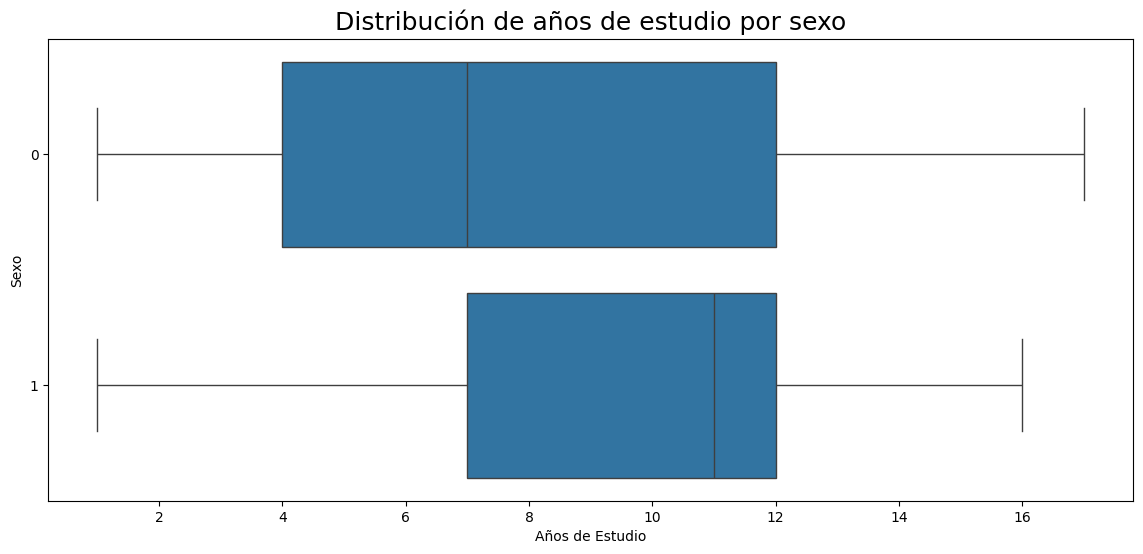

In [ ]:
ax_ade_sexo =sns.boxplot(x = 'Años de Estudio', y = 'Sexo', data = datos.query("Ingreso < 5000"), orient='h')
ax_ade_sexo.figure.set_size_inches(14,6)
ax_ade_sexo.set_title('Distribución de años de estudio por sexo', fontsize=18)

## ✅ Refelxión final:
Tomando en consideración las variables Sexo, Ingreso, Años de Estudio, se concluyé que en términos del ingreso la población femenina percibe menores ingresos que su contraparte masculina. Esto, apesar de que, en términos de los años de estudio las mujeres han invertido más años de estudio.

Sería pertinente revisar, en un futuro estudio, los empleos en los que más participan la población femenina; esto con la finalidad de explorar la siguiente hipótesis:

La población femenina se concentra en empleos que carecen de regulación en temas de igualdad de género.

## ✅ Indicaciones Finales

- Puedes acompañar tus respuestas con código, gráficos y explicaciones escritas.  
- Usa Markdown para organizar respuestas si lo haces en GitHub.  
- Si usas Jupyter, exporta el archivo como `.html` o `.pdf`.

---
## 🤖 Nota del autor:
Esta evaluación fue creada por la IA de Copilot con base a los temas vistos durante las sesiones de estudio del curso "Estadística con Python: frecuencias y medias"